In [40]:
%matplotlib inline
import torch
from torch.distributions import multinomial

In [48]:
fair_probs = torch.ones([6]) / 6
print(fair_probs)
multinomial.Multinomial(1, fair_probs).sample()

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


tensor([0., 0., 0., 1., 0., 0.])

In [50]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 2., 0., 2., 3.])

In [51]:
# Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample()
print(counts)
counts / 1000  # Relative frequency as the estimate


tensor([170., 147., 177., 169., 164., 173.])


tensor([0.1700, 0.1470, 0.1770, 0.1690, 0.1640, 0.1730])

In [53]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
print(counts)
cum_counts = counts.cumsum(dim=0)
print(cum_counts)

tensor([[4., 0., 3., 0., 1., 2.],
        [3., 1., 0., 1., 4., 1.],
        [1., 4., 2., 1., 0., 2.],
        ...,
        [0., 3., 4., 0., 2., 1.],
        [2., 3., 1., 1., 2., 1.],
        [2., 1., 2., 1., 1., 3.]])
tensor([[  4.,   0.,   3.,   0.,   1.,   2.],
        [  7.,   1.,   3.,   1.,   5.,   3.],
        [  8.,   5.,   5.,   2.,   5.,   5.],
        ...,
        [857., 816., 801., 809., 831., 866.],
        [859., 819., 802., 810., 833., 867.],
        [861., 820., 804., 811., 834., 870.]])


In [55]:
out = cum_counts.sum(dim=1, keepdims=True)
print(out)

tensor([[  10.],
        [  20.],
        [  30.],
        [  40.],
        [  50.],
        [  60.],
        [  70.],
        [  80.],
        [  90.],
        [ 100.],
        [ 110.],
        [ 120.],
        [ 130.],
        [ 140.],
        [ 150.],
        [ 160.],
        [ 170.],
        [ 180.],
        [ 190.],
        [ 200.],
        [ 210.],
        [ 220.],
        [ 230.],
        [ 240.],
        [ 250.],
        [ 260.],
        [ 270.],
        [ 280.],
        [ 290.],
        [ 300.],
        [ 310.],
        [ 320.],
        [ 330.],
        [ 340.],
        [ 350.],
        [ 360.],
        [ 370.],
        [ 380.],
        [ 390.],
        [ 400.],
        [ 410.],
        [ 420.],
        [ 430.],
        [ 440.],
        [ 450.],
        [ 460.],
        [ 470.],
        [ 480.],
        [ 490.],
        [ 500.],
        [ 510.],
        [ 520.],
        [ 530.],
        [ 540.],
        [ 550.],
        [ 560.],
        [ 570.],
        [ 580.],
        [ 590.

In [56]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
print(estimates)

tensor([[0.4000, 0.0000, 0.3000, 0.0000, 0.1000, 0.2000],
        [0.3500, 0.0500, 0.1500, 0.0500, 0.2500, 0.1500],
        [0.2667, 0.1667, 0.1667, 0.0667, 0.1667, 0.1667],
        ...,
        [0.1721, 0.1639, 0.1608, 0.1624, 0.1669, 0.1739],
        [0.1721, 0.1641, 0.1607, 0.1623, 0.1669, 0.1737],
        [0.1722, 0.1640, 0.1608, 0.1622, 0.1668, 0.1740]])


In [59]:
from IPython import display
from matplotlib import pyplot as plt

# Defined in file: ./chapter_preliminaries/calculus.md
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')


# Defined in file: ./chapter_preliminaries/calculus.md
def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

In [61]:
set_figsize((6, 4.5))

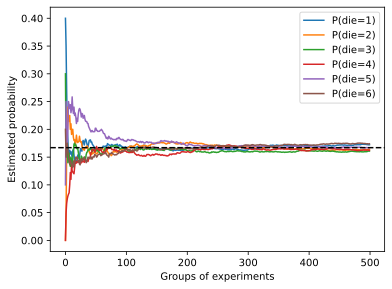

In [66]:
for i in range(6):
    plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend();

### Bayes' theorem

Using the definition of conditional probabilities, we can derive one of the most useful and celebrated equations in statistics: *Bayes' theorem*.
It goes as follows.
By construction, we have the *multiplication rule* that $P(A, B) = P(B \mid A) P(A)$. By symmetry, this also holds for $P(A, B) = P(A \mid B) P(B)$. Assume that $P(B) > 0$. Solving for one of the conditional variables we get

$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$$

Note that here we use the more compact notation where $P(A, B)$ is a *joint distribution* and $P(A \mid B)$ is a *conditional distribution*. Such distributions can be evaluated for particular values $A = a, B=b$.

### Marginalization

Bayes' theorem is very useful if we want to infer one thing from the other, say cause and effect, but we only know the properties in the reverse direction, as we will see later in this section. One important operation that we need, to make this work, is *marginalization*.
It is the operation of determining $P(B)$ from $P(A, B)$. We can see that the probability of $B$ amounts to accounting for all possible choices of $A$ and aggregating the joint probabilities over all of them:

$$P(B) = \sum_{A} P(A, B),$$

which is also known as the *sum rule*. The probability or distribution as a result of marginalization is called a *marginal probability* or a *marginal distribution*.


### Independence

Another useful property to check for is *dependence* vs. *independence*.
Two random variables $A$ and $B$ being independent
means that the occurrence of one event of $A$
does not reveal any information about the occurrence of an event of $B$.
In this case $P(B \mid A) = P(B)$. Statisticians typically express this as $A \perp  B$. From Bayes' theorem, it follows immediately that also $P(A \mid B) = P(A)$.
In all the other cases we call $A$ and $B$ dependent. For instance, two successive rolls of a die are independent. In contrast, the position of a light switch and the brightness in the room are not (they are not perfectly deterministic, though, since we could always have a broken light bulb, power failure, or a broken switch).

Since $P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A)$ is equivalent to $P(A, B) = P(A)P(B)$, two random variables are independent if and only if their joint distribution is the product of their individual distributions.
Likewise, two random variables $A$ and $B$ are *conditionally independent* given another random variable $C$
if and only if $P(A, B \mid C) = P(A \mid C)P(B \mid C)$. This is expressed as $A \perp B \mid C$.

### Application
:label:`subsec_probability_hiv_app`

Let us put our skills to the test. Assume that a doctor administers an HIV test to a patient. This test is fairly accurate and it fails only with 1% probability if the patient is healthy but reporting him as diseased. Moreover,
it never fails to detect HIV if the patient actually has it. We use $D_1$ to indicate the diagnosis ($1$ if positive and $0$ if negative) and $H$ to denote the HIV status ($1$ if positive and $0$ if negative).
:numref:`conditional_prob_D1` lists such conditional probabilities.

:Conditional probability of $P(D_1 \mid H)$.

| Conditional probability | $H=1$ | $H=0$ |
|---|---|---|
|$P(D_1 = 1 \mid H)$|            1 |         0.01 |
|$P(D_1 = 0 \mid H)$|            0 |         0.99 |
:label:`conditional_prob_D1`

Note that the column sums are all 1 (but the row sums are not), since the conditional probability needs to sum up to 1, just like the probability. Let us work out the probability of the patient having HIV if the test comes back positive, i.e., $P(H = 1 \mid D_1 = 1)$. Obviously this is going to depend on how common the disease is, since it affects the number of false alarms. Assume that the population is quite healthy, e.g., $P(H=1) = 0.0015$. To apply Bayes' theorem, we need to apply marginalization and the multiplication rule to determine

$$\begin{aligned}
&P(D_1 = 1) \\
=& P(D_1=1, H=0) + P(D_1=1, H=1)  \\
=& P(D_1=1 \mid H=0) P(H=0) + P(D_1=1 \mid H=1) P(H=1) \\
=& 0.011485.
\end{aligned}
$$

Thus, we get

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1)\\ =& \frac{P(D_1=1 \mid H=1) P(H=1)}{P(D_1=1)} \\ =& 0.1306 \end{aligned}.$$

In other words, there is only a 13.06% chance that the patient
actually has HIV, despite using a very accurate test.
As we can see, probability can be counterintuitive.

What should a patient do upon receiving such terrifying news? Likely, the patient
would ask the physician to administer another test to get clarity. The second
test has different characteristics and it is not as good as the first one, as shown in :numref:`conditional_prob_D2`.


:Conditional probability of $P(D_2 \mid H)$.

| Conditional probability | $H=1$ | $H=0$ |
|---|---|---|
|$P(D_2 = 1 \mid H)$|            0.98 |         0.03 |
|$P(D_2 = 0 \mid H)$|            0.02 |         0.97 |
:label:`conditional_prob_D2`

Unfortunately, the second test comes back positive, too.
Let us work out the requisite probabilities to invoke Bayes' theorem
by assuming the conditional independence:

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 0) \\
=& P(D_1 = 1 \mid H = 0) P(D_2 = 1 \mid H = 0)  \\
=& 0.0003,
\end{aligned}
$$

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 1) \\
=& P(D_1 = 1 \mid H = 1) P(D_2 = 1 \mid H = 1)  \\
=& 0.98.
\end{aligned}
$$

Now we can apply marginalization and the multiplication rule:

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1) \\
=& P(D_1 = 1, D_2 = 1, H = 0) + P(D_1 = 1, D_2 = 1, H = 1)  \\
=& P(D_1 = 1, D_2 = 1 \mid H = 0)P(H=0) + P(D_1 = 1, D_2 = 1 \mid H = 1)P(H=1)\\
=& 0.00176955.
\end{aligned}
$$

In the end, the probability of the patient having HIV given both positive tests is

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1, D_2 = 1)\\
=& \frac{P(D_1 = 1, D_2 = 1 \mid H=1) P(H=1)}{P(D_1 = 1, D_2 = 1)} \\
=& 0.8307.
\end{aligned}
$$

That is, the second test allowed us to gain much higher confidence that not all is well. Despite the second test being considerably less accurate than the first one, it still significantly improved our estimate.



## Expectation and Variance

To summarize key characteristics of probability distributions,
we need some measures.
The *expectation* (or average) of the random variable $X$ is denoted as

$$E[X] = \sum_{x} x P(X = x).$$

When the input of a function $f(x)$ is a random variable drawn from the distribution $P$ with different values $x$,
the expectation of $f(x)$ is computed as

$$E_{x \sim P}[f(x)] = \sum_x f(x) P(x).$$


In many cases we want to measure by how much the random variable $X$ deviates from its expectation. This can be quantified by the variance

$$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.$$

Its square root is called the *standard deviation*.
The variance of a function of a random variable measures
by how much the function deviates from the expectation of the function,
as different values $x$ of the random variable are sampled from its distribution:

$$\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$$